AttributeError: partially initialized module 'pandas' has no attribute '_pandas_datetime_CAPI' (most likely due to a circular import)

In [ ]:

stock_symbol = 'AAPL'
today = date.today()

# Download historical stock data
stock_data = yf.download(stock_symbol, start='2019-01-01', end=today.strftime("%Y-%m-%d"))
# Display the first few rows of the data with column names
print(stock_data.head())


In [ ]:
returns = stock_data['Adj Close'].pct_change().dropna()

# Calculate cumulative returns
cumulative_returns = (returns + 1).cumprod()

# Plot cumulative returns and mean line
plt.figure(figsize=(10, 6))
cumulative_returns.plot(label='Cumulative Returns', color='blue')
plt.axhline(cumulative_returns.mean() + 1, linestyle='--', color='red', label='Mean')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns with Mean Line')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
pip install ta

In [ ]:
# Calculate daily returns
daily_returns = returns.copy()

# Set risk-free rate
risk_free_rate = 0.0245

# Calculate Sortino Ratio
downside_returns = daily_returns[daily_returns < 0]
downside_deviation = downside_returns.std()
sortino_ratio = (cumulative_returns.mean() - risk_free_rate) / downside_deviation

# Calculate Sharpe Ratio
sharpe_ratio = (cumulative_returns.mean() - risk_free_rate) / cumulative_returns.std()

# Calculate Maximum Drawdown
cumulative_wealth = (1 + returns).cumprod()
previous_peaks = cumulative_wealth.cummax()
drawdowns = (cumulative_wealth - previous_peaks) / previous_peaks
max_drawdown = drawdowns.min()

# Calculate Calmar Ratio
calmar_ratio = (cumulative_returns.mean() - risk_free_rate) / max_drawdown


In [ ]:
print(f'Sharpe Ratio: {sharpe_ratio:.4f}')
print(f'Sortino Ratio: {sortino_ratio:.4f}')
print(f'Maximum Drawdown: {max_drawdown:.4%}')
print(f'Calmar Ratio: {calmar_ratio:.4f}')

/Users/mujtabach2/Coding/trading-site-backend/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


           Close    Short_MA     Long_MA
0      27.760000   28.086900   30.332337
1      27.932501   28.067950   30.335337
2      28.442499   28.038200   30.344737
3      28.440001   28.039550   30.354112
4      28.875000   28.040850   30.363800
...          ...         ...         ...
1810  131.860001  144.131800  152.133100
1811  130.029999  143.964799  152.009600
1812  126.040001  143.637399  151.886700
1813  129.610001  143.354599  151.759300
1814  129.929993  143.075999  151.611000

[459 rows x 3 columns]
Signal
 1    1356
-1     459
Name: count, dtype: int64


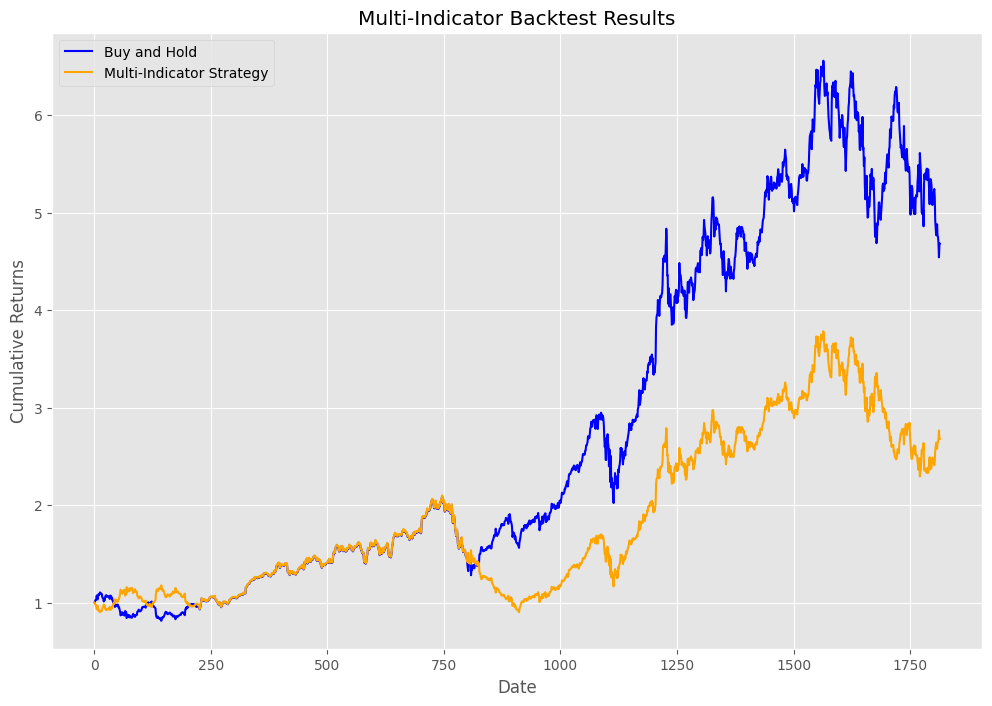

/Users/mujtabach2/Coding/trading-site-backend/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/Users/mujtabach2/Coding/trading-site-backend/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/Users/mujtabach2/Coding/trading-site-backend/venv/lib/python3.10/site-packages/matplotlib/ticker.py:2096: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
/Users/mujtabach2/Coding/trading-site-backend/venv/lib/python3.10/site-packages/matplotlib/ticker.py:2096: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
/Users/mujtabach2/Coding/trading-site-backend/venv/lib/python3.10/site-packages/matplotlib/ticker.py:2096: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
/Users/mujtabach2/Coding/trading-

1970-01-01 00:00:00.000000000         NaN
1970-01-01 00:00:00.000000001    1.005214
1970-01-01 00:00:00.000000002    1.023586
1970-01-01 00:00:00.000000003    1.023496
1970-01-01 00:00:00.000000004    1.039166
                                   ...   
1970-01-01 00:00:00.000001810    4.749000
1970-01-01 00:00:00.000001811    4.683078
1970-01-01 00:00:00.000001812    4.539346
1970-01-01 00:00:00.000001813    4.667948
1970-01-01 00:00:00.000001814    4.679475
Name: returns_f, Length: 1815, dtype: float64


/Users/mujtabach2/Coding/trading-site-backend/venv/lib/python3.10/site-packages/matplotlib/ticker.py:2096: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
/Users/mujtabach2/Coding/trading-site-backend/venv/lib/python3.10/site-packages/matplotlib/ticker.py:2096: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
/Users/mujtabach2/Coding/trading-site-backend/venv/lib/python3.10/site-packages/matplotlib/ticker.py:2096: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
/Users/mujtabach2/Coding/trading-site-backend/venv/lib/python3.10/site-packages/matplotlib/ticker.py:2096: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


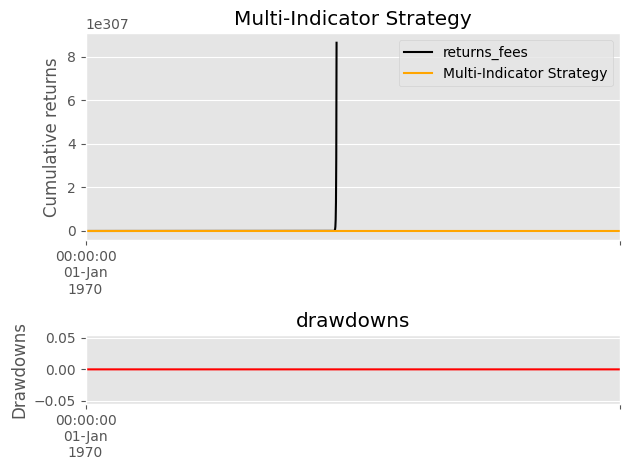

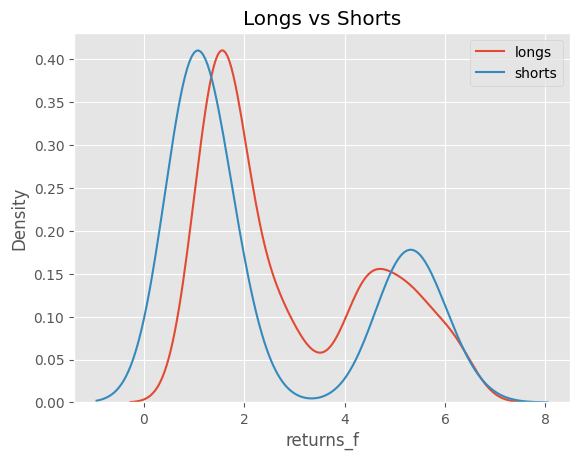

total longs: 1356
total shorts: 459
Sharpe: 1.56
calmar: inf
annualized returns: 0.154
max drawdown: 0.0
Long accuracy: 1.0
Short accuracy: 0.998


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ta  # Added ta library for RSI and MACD calculations

class BtStats:
    '''
    designed for use with stocks or other assets, needs modified for other assets
    '''

    def N_annual(freq):
        '''
        :param freq: frequency of backtest as string
        :return: number of periods per annum for chosen freq
        '''
        if freq == '1D':
            return 252  # Assuming 252 trading days in a year for stock market
        else:
            raise ValueError('Invalid freq')



    def sharpe_ratio(return_series, N):
        '''
        Calculate Sharpe ratio.

        :param return_series: Pandas Series of returns
        :param N: Number of periods per year
        :return: Sharpe ratio as a float
        '''
        risk_free_rate = 0.0245
        
        if len(return_series) <= 1:
            raise ValueError("Return series should have more than one data point.")
        
        return round((return_series.mean() - risk_free_rate) / return_series.std(), 3)


    def calmar_ratio(return_series, N, max_drawdown):
        if len(return_series) <= 1:
            raise ValueError("Return series should have more than one data point.")

        # Check if max_drawdown is zero
        if max_drawdown == 0:
            calmar = float('inf') if return_series.mean() > 0 else 0
        else:
            calmar = round(return_series.mean() * N / max_drawdown, 3)

        return calmar

    @staticmethod
    def max_drawdown(return_series):
        comp_ret = (return_series+1).cumprod()
        peak = comp_ret.expanding(min_periods=1).max()
        dd = (comp_ret/peak)-1
        return dd.min()




    @staticmethod
    def annualized_return(return_series, N):
        if len(return_series) <= 1:
            raise ValueError("Return series should have more than one data point.")

        total_ret = return_series.mean() # Total cumulative return
        annualized_ret = (total_ret ** (1 / len(return_series))) ** N - 1
        return round(annualized_ret, 3)




class BacktestProfile:

    def __init__(self, bt, freq, ret_type='comp', spread=1 / 10988, fees=5e-4):
        if not isinstance(bt, pd.DataFrame):
            raise ValueError('bt must be pandas dataframe object')

        self.fees = fees
        self.spread = spread
        self.total_fees = fees + spread
        self.bt = bt
        self.bt.set_index(pd.to_datetime(bt.index), inplace=True)
        self.N = BtStats.N_annual(freq)
        self.ret_type = ret_type

        if self.ret_type == 'comp':
            self.bt['returns_no_fee'] = self.compound_ret(self.bt['Returns'])
            self.bt['returns_f'] = self.fees_calc(self.bt['returns_no_fee'], self.fees)
            self.bt['returns_fees'] = self.compound_ret(self.bt['returns_f'])

        elif self.ret_type == 'simple':
            self.bt['returns_f'] = self.fees_calc(bt.returns, self.total_fees)
            self.bt['returns_no_fee'] = self.simple_returns(self.bt.returns)
            self.bt['returns_fees'] = self.simple_returns(self.bt.returns_f)
        else:
            raise ValueError('Ret type not recognized must be: {comp} or {simple}')


        self.n_longs, self.n_shorts = self.total_trades(self.bt['Signal'])

        self.n_trades = self.n_longs + self.n_shorts

        self.bt['Strategy_Returns_Scaled'] = self.bt['Signal'] * self.bt['Returns']
        # sharpe
        self.sharpe = BtStats.sharpe_ratio(self.bt['returns_f'], self.N)
        print(self.bt['returns_f'])
        # annualized returns
        self.annualized_return = BtStats.annualized_return(self.bt['returns_f'], self.N)
        
        
        self.bt['dd'] = BtStats.max_drawdown(self.bt.returns_f)
        self.max_dd = self.bt.dd.min()
        # calmar
        self.calmar = BtStats.calmar_ratio(self.bt.returns_f, self.N, self.max_dd)

        self.long_accuracy, self.short_accuracy = self.accuracy()

    @staticmethod
    def fees_calc(returns_col, fees):
        '''Calculate fees for returns_col.'''
        return returns_col - fees * 2


    @staticmethod
    def simple_returns(returns_col):
        return returns_col.cumsum() + 1

    @staticmethod
    def compound_ret(returns_col):
        return (returns_col + 1).cumprod()

    @staticmethod
    def total_trades(direction_series):
        longs = direction_series[direction_series == 1].sum()
        shorts = direction_series[direction_series == -1].sum()
        return longs, abs(shorts)

    def accuracy(self):
        longs = self.bt[self.bt['Signal'] == 1]
        shorts = self.bt[self.bt['Signal'] == -1]

        long_acc = len(longs[longs['returns_f'] > 0]) / max(len(longs), 1)
        short_acc = len(shorts[shorts['returns_f'] > 0]) / max(len(shorts), 1)

        return round(long_acc, 3), round(short_acc, 3)
           

    def show_ratios(self):
        print(f"Sharpe: {self.sharpe}")
        print(f"calmar: {self.calmar}")
        print(f"annualized returns: {self.annualized_return}")
        print(f"max drawdown: {abs(self.max_dd)}")
        print(f"Long accuracy: {self.long_accuracy}")
        print(f"Short accuracy: {self.short_accuracy}")

    def show_perf(self, title):
        plt.style.use('ggplot')
        fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
        self.bt.returns_fees.plot(ax=axes[0], color='black')
        self.bt.Strategy_Returns_Scaled.plot(ax=axes[0], color='orange', label='Multi-Indicator Strategy')
        axes[0].set_title(title)
        axes[0].set_ylabel('Cumulative returns')
        axes[0].legend()

        self.bt.dd.plot(ax=axes[1], color='red')
        axes[1].set_title('drawdowns')
        plt.ylabel('Drawdowns')
        plt.tight_layout()
        plt.show()

        longs = self.bt[self.bt['Signal'] == 1]
        shorts = self.bt[self.bt['Signal'] == -1]
        fig, ax = plt.subplots()
        ax = sns.kdeplot(data=longs['returns_f'], label='longs', ax=ax)
        ax = sns.kdeplot(data=shorts['returns_f'], label='shorts', ax=ax)
        ax.set_title("Longs vs Shorts")
        plt.legend()
        plt.show()

        print('==' * 50)
        print(f"total longs: {self.n_longs}")
        print(f"total shorts: {self.n_shorts}")
        self.show_ratios()
        print('==' * 50)




def multi_indicator_backtest(stock_symbol):
    # Download historical stock data
    stock_data = yf.download(stock_symbol, start='2015-01-01', end='2023-01-01')

    # Calculate technical indicators
    stock_data['Short_MA'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['Long_MA'] = stock_data['Close'].rolling(window=200).mean()
    
    # Use ta library for RSI calculation
    stock_data['RSI'] = ta.momentum.RSIIndicator(stock_data['Close'], window=14).rsi()
    
    # Use ta library for MACD calculation
    stock_data['MACD']= ta.trend.MACD(stock_data['Close'], window_fast=12, window_slow=26, window_sign=9).macd()
    
    # drop rows with missing values
    stock_data["MACD"].dropna(inplace=True)
    stock_data["RSI"].dropna(inplace=True)

    stock_data.dropna(subset=['Short_MA', 'Long_MA'], inplace=True)
    # Generate signals based on multiple indicators
    
    # Adjusted signal generation logic
    stock_data['Signal'] = np.where(
        (stock_data['Short_MA'] < stock_data['Long_MA']), -1,  # Enter short when Short_MA is below Long_MA
        np.where(
            (stock_data['Short_MA'] > stock_data['Long_MA']), 1, 0  # Enter long when Short_MA is above Long_MA
        )
)



# Reset index after dropping rows
    stock_data.reset_index(drop=True, inplace=True)
    
    # Calculate daily returns
    stock_data['Returns'] = stock_data['Close'].pct_change()
 

    # Apply the strategy to generate trades and returns
    # Calculate daily returns
    stock_data['Returns'] = stock_data['Close'].pct_change()

    # Apply the strategy to generate trades and returns
    stock_data['Strategy_Returns'] = stock_data['Signal'].shift(1) * stock_data['Returns'].fillna(0)

    # Calculate cumulative returns
    stock_data['Cumulative_Returns'] = (1 + stock_data['Returns']).cumprod().fillna(1)
    stock_data['Cumulative_Strategy_Returns'] = (1 + stock_data['Strategy_Returns']).cumprod().fillna(1)
 
    short_signals = stock_data[stock_data['Signal'] == -1]
    print(short_signals[['Close', 'Short_MA', 'Long_MA']])
    print(stock_data['Signal'].value_counts())


    
   


    return stock_data

if __name__ == '__main__':
    # Define stock symbol
    stock_symbol = 'AAPL'

    # Run the backtest
    backtest_data = multi_indicator_backtest(stock_symbol)

    plt.figure(figsize=(12, 8))
    plt.plot(backtest_data['Cumulative_Returns'], label='Buy and Hold', color='blue')
    plt.plot(backtest_data['Cumulative_Strategy_Returns'], label='Multi-Indicator Strategy', color='orange')
    plt.title('Multi-Indicator Backtest Results')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()

    # Run the performance analysis
    BT = BacktestProfile(backtest_data, freq='1D')
    BT.show_perf("Multi-Indicator Strategy")


In [ ]:
print("1",backtest_data[['Cumulative_Returns', 'Cumulative_Strategy_Returns']])
print("2",backtest_data['Signal'])
print("3",backtest_data[['Close', 'Returns']])

1                                Cumulative_Returns  Cumulative_Strategy_Returns
1970-01-01 00:00:00.000000000            1.000000                     1.000000
1970-01-01 00:00:00.000000001            1.006214                     0.993786
1970-01-01 00:00:00.000000002            1.024586                     0.975641
1970-01-01 00:00:00.000000003            1.024496                     0.975641
1970-01-01 00:00:00.000000004            1.040166                     0.975641
...                                           ...                          ...
1970-01-01 00:00:00.000001810            4.750000                     1.683551
1970-01-01 00:00:00.000001811            4.684078                     1.706916
1970-01-01 00:00:00.000001812            4.540346                     1.759293
1970-01-01 00:00:00.000001813            4.668948                     1.709462
1970-01-01 00:00:00.000001814            4.680475                     1.705242

[1815 rows x 2 columns]
2 1970-01-01 00:00:00.000

In [ ]:
plt.plot(backtest_data['Signal'], marker='o', linestyle='None', markersize=5)
plt.title('Signals')
plt.xlabel('Date')
plt.ylabel('Signal')
plt.show()


In [15]:
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

plt.style.use('ggplot')

today = date.today()
start = dt.datetime(2013, 1, 1)
end = dt.datetime(today.year, today.month, today.day)

tickers = ['AAPL', 'AMZN', 'MSFT', 'GOOGL', 'TSLA']

# Download stock prices
stocks = yf.download(tickers, start=start, end=end, progress=False)['Adj Close']

import pandas as pd
import numpy as np

def calculate_metrics(returns):
    # Calculate annual returns
    annual_returns = returns.resample('Y').last().pct_change().mean() * 252

    # Calculate daily drawdown using the provided formula
    roll_max = returns.rolling(window=len(returns), min_periods=1).max()
    daily_drawdown = returns / roll_max - 1.0

    # Calculate max daily drawdown using the provided formula
    max_daily_drawdown = daily_drawdown.rolling(window=len(daily_drawdown), min_periods=1).min()

    # Calculate max drawdown as the minimum (negative) max daily drawdown
    max_drawdown = -max_daily_drawdown.min()

    # Calculate annualized volatility
    annualized_volatility = returns.std() * np.sqrt(252)

    # Calculate Sharpe ratio
    sharpe_ratio = annual_returns / annualized_volatility

    # Calculate Calmar ratio
    calmar_ratio = annual_returns / abs(max_drawdown)
    
   
    return {
        'Annual Returns': annual_returns,
        'Max Drawdown': max_drawdown,
        'Sharpe Ratio': sharpe_ratio,
        'Calmar Ratio': calmar_ratio,
    }



# Calculate metrics for each stock
metrics_dict = {}
for ticker in tickers:
    metrics_dict[ticker] = calculate_metrics(stocks[ticker])

# Convert metrics to a DataFrame for better readability
metrics_df = pd.DataFrame(metrics_dict)

# Display the calculated metrics
print(metrics_df)
def get_results():
    # Calculate metrics for each stock
    metrics_dict = {}
    for ticker in tickers:
        metrics_dict[ticker] = calculate_metrics(stocks[ticker])

    # Convert metrics to a DataFrame for better readability
    metrics_df = pd.DataFrame(metrics_dict)

    return metrics_df


/Users/mujtabach2/Coding/trading-site-backend/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/mujtabach2/Coding/trading-site-backend/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/mujtabach2/Coding/trading-site-backend/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/mujtabach2/Coding/trading-site-backend/venv/lib/python3.10/site-packages

NameError: name 'sortino_ratio' is not defined